Important Utilities for the code.

In [93]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline

Loading the Dataset.

In [94]:
data = pd.read_csv('/content/spam_or_not_spam.csv')
print(data.head())
print(data.info())

                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   email   2999 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB
None


Checking for Null Values.

In [95]:
data.isnull().sum()

,0
email,1
label,0


Dropping Null Values.

In [96]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

Data Cleaning and Preprocessing.

In [97]:
def preprocess_text(text):
    # Check if text is NaN or not a string
    if pd.isna(text) or not isinstance(text, str):
        return ''

    # Lowercase
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text


Preprocessing to Email column.

In [98]:
#Applying the preprocess_text function to emails
data['clean_email'] = data['email'].apply(preprocess_text)

Checking the data types for each column.

In [99]:
print(data.dtypes)

email          object
label           int64
clean_email    object
dtype: object


Plotting the Email Count Graph and visualizing.

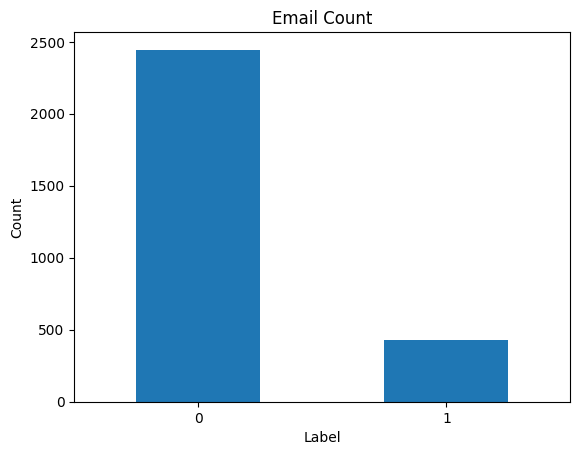

In [100]:
email_count = data['label'].value_counts()
email_count.plot(kind = 'bar')
plt.title('Email Count')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Splitting the features and Label.

In [101]:
X = data['clean_email']
y = data['label']

Splitting the data into training and testing sets.

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Feature extraction using TF-IDF.

In [109]:
tfidf = TfidfVectorizer()

Function to train and evaluate the model.

In [110]:
def train_and_evaluate_model(model):
    # Create a pipeline
    pipeline = make_pipeline(tfidf, model)

    # Fit the model
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")
    return accuracy

Train and Evaluate Naive Bayes Model.

In [111]:
naive_bayes_model = MultinomialNB()
naive_bayes_accuracy = train_and_evaluate_model(naive_bayes_model)

Accuracy for MultinomialNB: 0.8785


Train and Evaluate SVM Model.

In [112]:
svm_model = SVC(kernel='linear')
svm_accuracy = train_and_evaluate_model(svm_model)

Accuracy for SVC: 0.9965


Visualizing Again to Check both Models results.

In [113]:
models = ['Naive Bayes', 'SVM']
accuracies = [naive_bayes_accuracy, svm_accuracy]

Plotting the Graph.

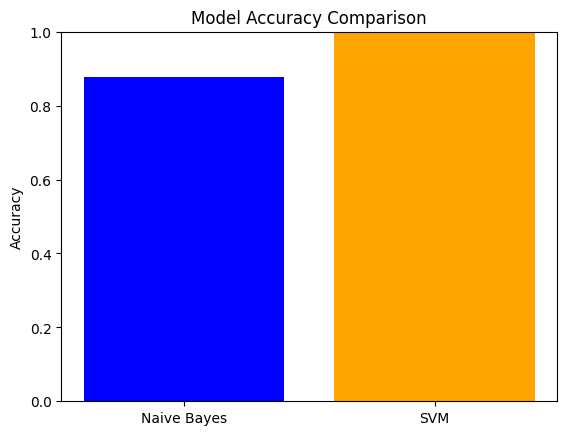

In [114]:
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Set y-axis limits to [0, 1]
plt.show()